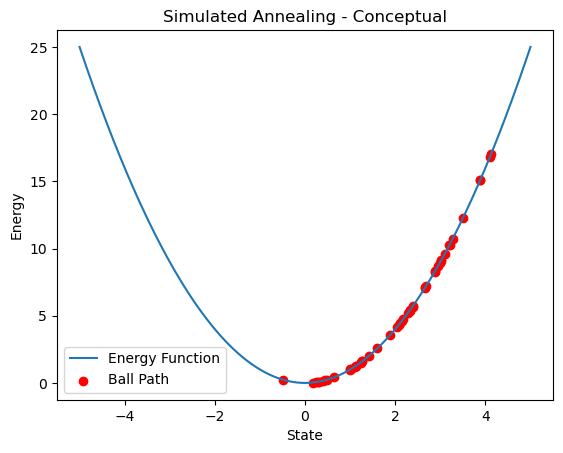

In [1]:
# Simulated Annealing Visualization

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,200)
y = x**2
positions = np.linspace(4,0,50) + np.random.normal(0,0.2,50)

plt.plot(x,y,label='Energy Function')
plt.scatter(positions, positions**2, color='red', label='Ball Path')
plt.title("Simulated Annealing - Conceptual")
plt.xlabel("State")
plt.ylabel("Energy")
plt.legend()
plt.show()


### Conceptual / Classroom Version
- **Purpose:** Illustrates SA idea: accepting worse solutions early and gradually cooling.  
- **Red points along curve:** Positions of a “ball” on the energy (fitness) landscape.  
- **Energy curve:** Shows fitness function.  
- **Note:** Simplified; no real probabilistic acceptance logic.

In [2]:
import numpy as np
import plotly.graph_objects as go

def f(x):
    return x**2

num_iterations = 50
x_current = np.random.uniform(-5,5)
temperature = 10
cooling_rate = 0.9
frames = []

for it in range(num_iterations):
    x_new = x_current + np.random.uniform(-1,1)
    delta = f(x_new)-f(x_current)
    if delta < 0 or np.random.rand() < np.exp(-delta/temperature):
        x_current = x_new
    temperature *= cooling_rate
    frames.append(go.Frame(
        data=[go.Scatter(x=[x_current], y=[f(x_current)],
                         mode='markers', marker=dict(size=10, color='red'))]
    ))

x_plot = np.linspace(-5,5,200)
fig = go.Figure(
    data=[go.Scatter(x=x_plot, y=f(x_plot), mode='lines', line=dict(color='blue')),
          frames[0].data[0]],
    layout=go.Layout(title='Simulated Annealing - Simulation',
                     updatemenus=[dict(type='buttons',
                                       showactive=False,
                                       buttons=[dict(label='Play',
                                                     method='animate',
                                                     args=[None, {"frame":{"duration":200,"redraw":True},
                                                                  "fromcurrent":True}])])])
)
fig.frames = frames
fig.show()


### Realistic / Simulation Version
- **Purpose:** Simulates SA iterations with probabilistic acceptance of uphill moves.  
- **Red marker:** Moves dynamically, representing current solution.  
- **Temperature:** Gradually decreases, reducing probability of accepting worse solutions.  
- **Animation:** Shows convergence to minimum over iterations.